In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
from scipy import stats
import os
import numpy as np
import glob
from scipy.stats import gaussian_kde
import seaborn as sns
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = "sans-serif"

In [2]:
path = r'E:\Downloads\ManducaMultiSenseData\v3\Step6_v3'
outpath_figg = r'E:\Downloads\ManducaMultiSenseData\Stats'

In [3]:
notoutliers = pd.read_csv(path + "\\" + 'AllLight_EveryMoth_notOutliers.csv')
notoutliers['DiscoveryTime'] = notoutliers.DiscoveryTime.div(100,axis = 'index')
notoutliers.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,In_Frame,Out_Frame,Proboscis,DiscoveryTime,trialNum,name,zscore,outlier_ID,condition
0,0,7,7,45940,53025,46222.0,2.82,0,L0.1_c-3_m20,0.251222,False,Low
1,1,8,8,55058,60805,55341.0,2.83,1,L0.1_c-3_m20,0.249691,False,Low
2,2,9,9,67612,69165,67744.0,1.32,2,L0.1_c-3_m20,0.480929,False,Low
3,3,10,10,72461,74177,72606.0,1.45,3,L0.1_c-3_m20,0.461021,False,Low
4,4,11,11,77368,79850,77499.0,1.31,4,L0.1_c-3_m20,0.482460,False,Low


Text(0.5, 0, 'Occurance')

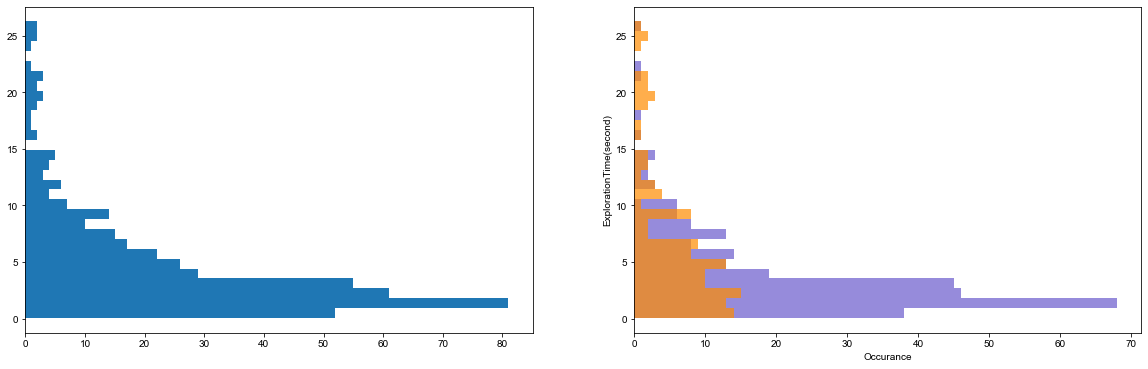

In [4]:
hist, bins = np.histogram(notoutliers.DiscoveryTime.values, bins = 30)

fig, ax = plt.subplots(1,2, figsize = (20,6))
ax = ax.ravel()

ax[0].hist(notoutliers.DiscoveryTime.values, bins, histtype = 'bar', orientation='horizontal')
ax[1].hist(notoutliers.DiscoveryTime[notoutliers.name.str.contains('L0.1_')].values, bins, 
          orientation='horizontal', alpha = 0.7, color = 'slateblue')
ax[1].hist(notoutliers.DiscoveryTime[notoutliers.name.str.contains('L50_')].values, bins, 
          orientation='horizontal', alpha = 0.7, color = 'darkorange')
ax[1].set_ylabel('ExplorationTime(second)')
ax[1].set_xlabel('Occurance')

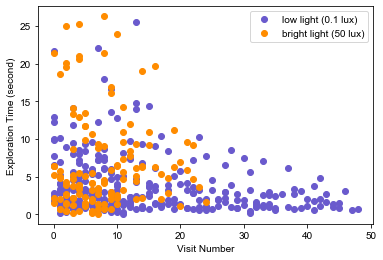

In [5]:
plt.plot(notoutliers[notoutliers.name.str.contains('L0.1')].trialNum, 
         notoutliers[notoutliers.name.str.contains('L0.1')].DiscoveryTime,
         'o', color = 'slateblue', label = 'low light (0.1 lux)')
plt.plot(notoutliers[notoutliers.name.str.contains('L50')].trialNum, 
         notoutliers[notoutliers.name.str.contains('L50')].DiscoveryTime, 
         'o', color = 'darkorange', label = 'bright light (50 lux)')
plt.ylabel('Exploration Time (second)')
plt.xlabel('Visit Number')
plt.legend()

# add exponential curves - color: L50 - chocolate or saddle brown, L0.1 - darkslateblue, or blue violet

In [6]:
first_0thru10_low = len(notoutliers[(notoutliers.name.str.contains('L0.1')) & (notoutliers.trialNum >= 0) & (notoutliers.trialNum <= 9)].values)
first_5thru15_low = len(notoutliers[(notoutliers.name.str.contains('L0.1')) & (notoutliers.trialNum >= 5) & (notoutliers.trialNum <= 14)].values)
first_10thru20_low = len(notoutliers[(notoutliers.name.str.contains('L0.1')) & (notoutliers.trialNum >= 9) & (notoutliers.trialNum <= 19)].values)
first_15thru25_low = len(notoutliers[(notoutliers.name.str.contains('L0.1')) & (notoutliers.trialNum >= 14) & (notoutliers.trialNum <= 19)].values)
first_20thru30_low = len(notoutliers[(notoutliers.name.str.contains('L0.1')) & (notoutliers.trialNum >= 19) & (notoutliers.trialNum <= 29)].values)

In [7]:
first_0thru10_high = len(notoutliers[(notoutliers.name.str.contains('L50')) & (notoutliers.trialNum >= 0) & (notoutliers.trialNum <= 9)].values)
first_5thru15_high = len(notoutliers[(notoutliers.name.str.contains('L50')) & (notoutliers.trialNum >= 4) & (notoutliers.trialNum <= 14)].values)
first_10thru20_high = len(notoutliers[(notoutliers.name.str.contains('L50')) & (notoutliers.trialNum >= 9) & (notoutliers.trialNum <= 17)].values)
first_15thru25_high = len(notoutliers[(notoutliers.name.str.contains('L50')) & (notoutliers.trialNum >= 14) & (notoutliers.trialNum <= 19)].values)
first_20thru30_high = len(notoutliers[(notoutliers.name.str.contains('L50')) & (notoutliers.trialNum >= 19) & (notoutliers.trialNum <= 29)].values)

In [8]:
#0thru10
print('low visits',first_0thru10_low), print('high visits',first_0thru10_high)

low visits 141
high visits 89


(None, None)

In [9]:
#5thru15
print('low visits',first_5thru15_low), print('high visits',first_5thru15_high)

low visits 109
high visits 79


(None, None)

In [10]:
#10thru20
print('low visits',first_10thru20_low), print('high visits',first_10thru20_high)

low visits 82
high visits 38


(None, None)

In [11]:
#15thru25
print('low visits',first_15thru25_low), print('high visits',first_15thru25_high)

low visits 34
high visits 14


(None, None)

In [12]:
#20thru30
print('low visits',first_20thru30_low), print('high visits',first_20thru30_high)

low visits 45
high visits 10


(None, None)

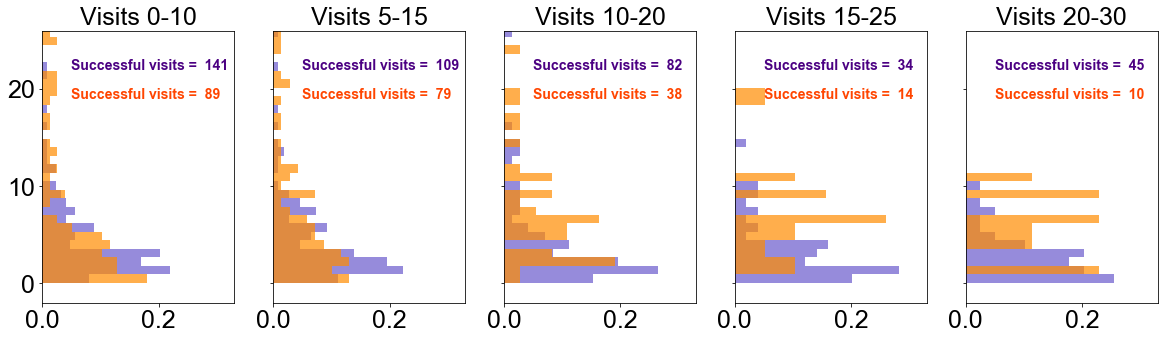

In [13]:
fig, ax = plt.subplots(1,5, figsize = (20,5), sharex = True, sharey = True)
ax = ax.ravel()


hist_0thru10_lowlight, _, _ = ax[0].hist(notoutliers.DiscoveryTime[(notoutliers.name.str.contains('L0.1_')) & 
                                     (notoutliers.trialNum >= 0) & (notoutliers.trialNum <= 9)].values,
           bins, orientation='horizontal', alpha = 0.7, color = 'slateblue', density = True)
hist_0thru10_highlight, _, _ = ax[0].hist(notoutliers.DiscoveryTime[(notoutliers.name.str.contains('L50_')) & 
                                     (notoutliers.trialNum >= 0) & (notoutliers.trialNum <= 9)].values,  
           bins, orientation='horizontal', alpha = 0.7, color = 'darkorange', density = True)


hist_5thru15_lowlight, _, _ = ax[1].hist(notoutliers.DiscoveryTime[(notoutliers.name.str.contains('L0.1_')) & 
                                      (notoutliers.trialNum >= 4) & (notoutliers.trialNum <= 14)].values,
           bins, orientation='horizontal', alpha = 0.7, color = 'slateblue', density = True)
hist_5thru15_highlight, _, _ = ax[1].hist(notoutliers.DiscoveryTime[(notoutliers.name.str.contains('L50_')) & 
                                      (notoutliers.trialNum >= 4) & (notoutliers.trialNum <= 14)].values, 
           bins, orientation='horizontal', alpha = 0.7, color = 'darkorange', density = True)


hist_10thru20_lowlight, _, _ = ax[2].hist(notoutliers.DiscoveryTime[(notoutliers.name.str.contains('L0.1_')) & 
                                     (notoutliers.trialNum >= 9) & (notoutliers.trialNum <= 19)].values,
           bins, orientation='horizontal', alpha = 0.7, color = 'slateblue', density = True)
hist_10thru20_highlight, _, _ = ax[2].hist(notoutliers.DiscoveryTime[(notoutliers.name.str.contains('L50_')) & 
                                     (notoutliers.trialNum >= 9) & (notoutliers.trialNum <= 19)].values, 
           bins, orientation='horizontal', alpha = 0.7, color = 'darkorange', density = True)

hist_15thru25_lowlight, _, _ = ax[3].hist(notoutliers.DiscoveryTime[(notoutliers.name.str.contains('L0.1_')) & 
                                       (notoutliers.trialNum >= 14) & (notoutliers.trialNum <= 24)].values,
           bins, orientation='horizontal', alpha = 0.7, color = 'slateblue', density = True)
hist_15thru25_highlight, _, _ = ax[3].hist(notoutliers.DiscoveryTime[(notoutliers.name.str.contains('L50_')) & 
                                      (notoutliers.trialNum >= 14) & (notoutliers.trialNum <= 24)].values, 
           bins, orientation='horizontal', alpha = 0.7, color = 'darkorange', density = True)



         
    
hist_20thru30_lowlight, _, _ = ax[4].hist(notoutliers.DiscoveryTime[(notoutliers.name.str.contains('L0.1_')) & 
                                     (notoutliers.trialNum >= 19) & (notoutliers.trialNum <= 29)].values,
           bins, orientation='horizontal', alpha = 0.7, color = 'slateblue', density = True)
hist_20thru30_highlight, _, _ = ax[4].hist(notoutliers.DiscoveryTime[(notoutliers.name.str.contains('L50_')) & 
                                     (notoutliers.trialNum >= 19) & (notoutliers.trialNum <= 29)].values, 
           bins, orientation='horizontal', alpha = 0.7, color = 'darkorange', density = True)




ax[0].set_title('Visits 0-10', size = 25)
ax[1].set_title('Visits 5-15', size = 25)
ax[2].set_title('Visits 10-20', size = 25)
ax[3].set_title('Visits 15-25', size = 25)
ax[4].set_title('Visits 20-30', size = 25)
                                     



ax[0].set_ylim(-2, 26)
# ax[0].set_ylabel('ExplorationTime (seconds)', size = 30, color = 'k')
ax[0].set_xlim(0,.33)

ax[0].tick_params(labelsize = 25, labelcolor = 'k')
ax[1].tick_params(labelsize = 25, labelcolor = 'k')
ax[2].tick_params(labelsize = 25, labelcolor = 'k')
ax[3].tick_params(labelsize = 25, labelcolor = 'k')
ax[4].tick_params(labelsize = 25, labelcolor = 'k')



ax[0].text(0.05, 22, 'Successful visits =  ' + str(first_0thru10_low), color = 'indigo', weight = 'bold', size = 14)
ax[0].text(0.05, 19, 'Successful visits =  ' + str(first_0thru10_high), color = 'orangered', weight = 'bold', size = 14)


ax[1].text(0.05, 22, 'Successful visits =  ' + str(first_5thru15_low), color = 'indigo', weight = 'bold', size = 14)
ax[1].text(0.05, 19, 'Successful visits =  ' + str(first_5thru15_high), color = 'orangered', weight = 'bold', size = 14)


ax[2].text(0.05, 22, 'Successful visits =  ' + str(first_10thru20_low),  color = 'indigo', weight = 'bold',size = 14)
ax[2].text(0.05, 19, 'Successful visits =  ' + str(first_10thru20_high), color = 'orangered', weight = 'bold', size = 14)


ax[3].text(0.05, 22, 'Successful visits =  ' + str(first_15thru25_low), color = 'indigo', weight = 'bold', size = 14)
ax[3].text(0.05, 19, 'Successful visits =  ' + str(first_15thru25_high), color = 'orangered', weight = 'bold', size = 14)


ax[4].text(0.05, 22, 'Successful visits =  ' + str(first_20thru30_low), color = 'indigo', weight = 'bold', size = 14)
ax[4].text(0.05, 19, 'Successful visits =  ' + str(first_20thru30_high), color = 'orangered', weight = 'bold', size = 14)



                                         

plt.savefig(outpath_figg + "//" + 'Visits_0-30.svg')
# if the plots are normalized to the total number of hits for each window then the size difference in the 20+seconds bin is due to a larger proportion of each condition being from the lower time bins as the moths learn

In [14]:
def KL(P,Q, epsilon):
# """ Epsilon is used here to avoid conditional code for
# checking that neither P nor Q is equal to 0. """
     epsilon = 1e-20
# You may want to instead make copies to avoid changing the np arrays.
     P = P+epsilon
     Q = Q+epsilon
     
     divergence = np.sum(P*np.log(P/Q))
      
     return divergence

In [15]:
#Divergence for first 10 visits
KL(hist_0thru10_lowlight, hist_0thru10_highlight, 1e-30)

3.376069403474808

In [16]:
#Divergence for visits 5-15
KL(hist_5thru15_lowlight, hist_5thru15_highlight, 1e-30)

1.0677347351835849

In [17]:
#Divergence for visits 10-20
KL(hist_10thru20_lowlight, hist_10thru20_highlight, 1e-30)

9.141868590462419

In [18]:
#Divergence for visits 15-25
KL(hist_15thru25_lowlight, hist_15thru25_highlight, 1e-30)

14.487850172007327

In [19]:
#Significance for first 10 visits
stats.mannwhitneyu(notoutliers.DiscoveryTime[(notoutliers.name.str.contains('L0.1_')) & 
(notoutliers.trialNum >= 0) & (notoutliers.trialNum <= 9)].values, 
               notoutliers.DiscoveryTime[(notoutliers.name.str.contains('L50_')) & 
                                     (notoutliers.trialNum >= 0) & (notoutliers.trialNum <= 9)].values)

MannwhitneyuResult(statistic=5791.5, pvalue=0.16312341953027681)

In [20]:
stats.mannwhitneyu(notoutliers.DiscoveryTime[(notoutliers.name.str.contains('L0.1_')) & 
(notoutliers.trialNum >= 4) & (notoutliers.trialNum <= 14)].values, 
               notoutliers.DiscoveryTime[(notoutliers.name.str.contains('L50_')) & 
                                     (notoutliers.trialNum >= 4) & (notoutliers.trialNum <= 14)].values)

MannwhitneyuResult(statistic=3841.0, pvalue=0.006063569689689347)

In [21]:
stats.mannwhitneyu(notoutliers.DiscoveryTime[(notoutliers.name.str.contains('L0.1_')) & 
(notoutliers.trialNum >= 9) & (notoutliers.trialNum <= 19)].values, 
               notoutliers.DiscoveryTime[(notoutliers.name.str.contains('L50_')) & 
                                     (notoutliers.trialNum >= 9) & (notoutliers.trialNum <= 19)].values)

MannwhitneyuResult(statistic=910.5, pvalue=9.266898173522531e-06)

In [22]:
stats.mannwhitneyu(notoutliers.DiscoveryTime[(notoutliers.name.str.contains('L0.1_')) & 
(notoutliers.trialNum >= 14) & (notoutliers.trialNum <= 24)].values, 
               notoutliers.DiscoveryTime[(notoutliers.name.str.contains('L50_')) & 
                                     (notoutliers.trialNum >= 14) & (notoutliers.trialNum <= 24)].values)

MannwhitneyuResult(statistic=284.0, pvalue=8.982124708609307e-05)

In [23]:
stats.mannwhitneyu(notoutliers.DiscoveryTime[(notoutliers.name.str.contains('L0.1_')) & 
(notoutliers.trialNum >= 19) & (notoutliers.trialNum <= 29)].values, 
               notoutliers.DiscoveryTime[(notoutliers.name.str.contains('L50_')) & 
                                     (notoutliers.trialNum >= 19) & (notoutliers.trialNum <= 29)].values)

MannwhitneyuResult(statistic=94.0, pvalue=0.0022008094942912097)

In [24]:
stats.mannwhitneyu(notoutliers.DiscoveryTime[(notoutliers.name.str.contains('L0.1_'))].values, 
               notoutliers.DiscoveryTime[(notoutliers.name.str.contains('L50_'))].values)

MannwhitneyuResult(statistic=13990.0, pvalue=7.234713746881468e-07)

In [25]:
stats.ks_2samp(notoutliers.DiscoveryTime[(notoutliers.name.str.contains('L0.1_'))].values, 
               notoutliers.DiscoveryTime[(notoutliers.name.str.contains('L50_'))].values)

Ks_2sampResult(statistic=0.27673051586095065, pvalue=1.1028006310365157e-06)

In [26]:
First_3 = notoutliers[(notoutliers.trialNum >= 0) & (notoutliers.trialNum <= 3)]
First_5 = notoutliers[(notoutliers.trialNum >= 4) & (notoutliers.trialNum <= 14)]
First_10 = notoutliers[(notoutliers.trialNum >= 9) & (notoutliers.trialNum <= 19)]
# Visits_15thru25 = notoutliers[(notoutliers.trialNum > 14) & (notoutliers.trialNum <= 24)]
First_20 = notoutliers[(notoutliers.trialNum >= 14) & (notoutliers.trialNum <= 19)] 
First_30 = notoutliers[(notoutliers.trialNum >= 19) & (notoutliers.trialNum <= 29)]
All = notoutliers[(notoutliers.trialNum >= 24) & (notoutliers.trialNum <= 34)]
#look at data to see better lateTrial numbers

In [27]:
def kde_scipy(x):
    """Kernel Density Estimation with Scipy"""
    kde = gaussian_kde(x)
    return kde

In [28]:
alldata = First_3.DiscoveryTime/100
_,bins = np.histogram(alldata, bins = 100, density = True)
bin_center = 0.5*(bins[1:]+bins[:-1])
bin_center = np.linspace(0,60,200)
delta = np.diff(bin_center)[0]

In [29]:
First_3_df = pd.DataFrame(index = bin_center, columns = ['Low', 'High'], dtype = 'float')
First_5_df = pd.DataFrame(index = bin_center, columns = ['Low', 'High'], dtype = 'float')
First_10_df = pd.DataFrame(index = bin_center, columns = ['Low', 'High'], dtype = 'float')
First_20_df = pd.DataFrame(index = bin_center, columns = ['Low', 'High'], dtype = 'float')
First_30_df = pd.DataFrame(index = bin_center, columns = ['Low', 'High'], dtype = 'float')
All_df = pd.DataFrame(index = bin_center, columns = ['Low', 'High'], dtype = 'float')
SampleSize = pd.DataFrame(index = ['low', 'high'], columns = ['3', '5', '10', '15-25', '20', '30', 'all'], dtype = 'float')

In [30]:
notoutliers

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,In_Frame,Out_Frame,Proboscis,DiscoveryTime,trialNum,name,zscore,outlier_ID,condition
0,0,7,7,45940,53025,46222.0,2.82,0,L0.1_c-3_m20,0.251222,False,Low
1,1,8,8,55058,60805,55341.0,2.83,1,L0.1_c-3_m20,0.249691,False,Low
2,2,9,9,67612,69165,67744.0,1.32,2,L0.1_c-3_m20,0.480929,False,Low
3,3,10,10,72461,74177,72606.0,1.45,3,L0.1_c-3_m20,0.461021,False,Low
4,4,11,11,77368,79850,77499.0,1.31,4,L0.1_c-3_m20,0.482460,False,Low
...,...,...,...,...,...,...,...,...,...,...,...,...
426,127,212,212,53299,64004,53678.0,3.79,3,L50_c-3_m6,0.454744,False,High
427,128,213,213,66741,74462,68835.0,20.94,4,L50_c-3_m6,2.302145,False,High
428,129,214,214,34638,36456,35273.0,6.35,0,L50_c-3_m9,0.043220,False,High
429,130,215,215,39710,41501,39782.0,0.72,1,L50_c-3_m9,0.948252,False,High


High
Low
High
Low


<Figure size 432x288 with 0 Axes>

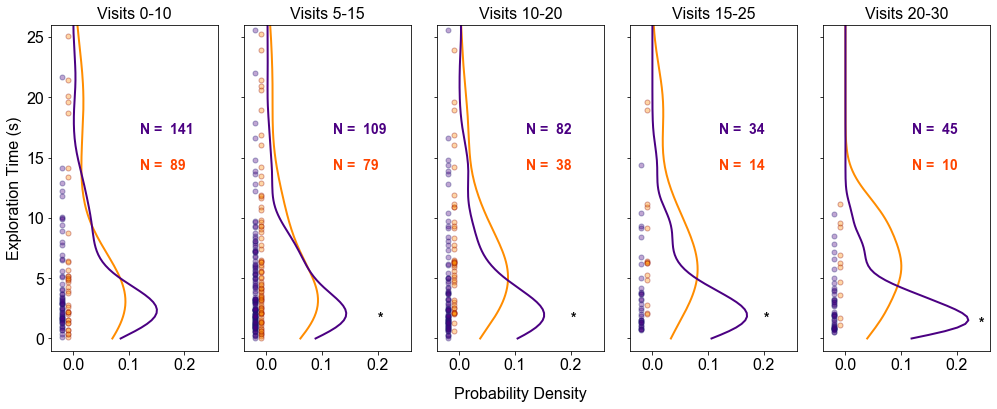

In [31]:
plt.set_cmap('Spectral')
f2, ax2 = plt.subplots(1,5,sharex = True, sharey = True, figsize = (6.975*2,2.880*2))


offset = 0

V_0thru10_low = []
V_0thru10_high = []
for f, df in First_3.groupby('condition', sort = True):
    print(f)
    data = df.DiscoveryTime   
    SampleSize.loc[f,'3'] = len(data)
    kde = kde_scipy(data)
    
    temp = kde.pdf(bin_center)
    temp /= delta * np.sum(temp)
    First_3_df.loc[:,f]=temp
    if f.startswith("Low"):
        c = 'indigo'
        V_0thru10_low.extend(temp)
        d = 'midnightblue'
    elif f.startswith("High"):
        c = 'darkorange'
        V_0thru10_high.extend(temp)
        
        d = 'darkred'

    p = ax2[0].plot(temp, bin_center, label = f, color = c, linewidth = 2.0)
    ax2[0].plot([-0.01 + offset]*len(data), data, "o" , ms = 5, color = c, mec = d, alpha = 0.35)
    offset+=-0.01

    ax2[0].set_title('Visits 0-10', fontsize = 16)
offset = 0
V_5thru15_low = []
V_5thru15_high = []
for f, df in First_5.groupby('condition', sort = True):

    data = df.DiscoveryTime    
    SampleSize.loc[f,'5'] = len(data)
    kde = kde_scipy(data)
    
    temp = kde.pdf(bin_center)
    temp /= delta * np.sum(temp)
    First_5_df.loc[:,f]=temp
    
    if f.startswith("Low"):
        c = 'indigo'
        V_5thru15_low.extend(temp)
        d = 'midnightblue'
    elif f.startswith("High"):
        c = 'darkorange'
        V_5thru15_high.extend(temp)
        d = 'darkred'
        

    p = ax2[1].plot(temp, bin_center,  label = f, color = c, linewidth = 2.0)
    ax2[1].plot([-0.01 + offset]*len(data), data, "o" , ms = 5, color = c, mec = d, alpha = 0.35)
    offset+=-0.01

    ax2[1].set_title('Visits 5-15', fontsize = 16)
    
offset = 0
V_10thru20_low = []
V_10thru20_high = []
for f, df in First_10.groupby('condition', sort = True):
    
    data = df.DiscoveryTime   
    SampleSize.loc[f,'10'] = len(data)
    kde = kde_scipy(data)
    
    temp = kde.pdf(bin_center)
    temp /= delta * np.sum(temp)
    First_10_df.loc[:,f]=temp
    
    if f.startswith("Low"):
        c = 'indigo'
        V_10thru20_low.extend(temp)
        d = 'midnightblue'
    elif f.startswith("High"):
        c = 'darkorange'
        
        V_10thru20_high.extend(temp)
        d = 'darkred'

    p = ax2[2].plot(temp, bin_center, label = f, color = c, linewidth = 2.0)
    ax2[2].plot([-0.01 + offset]*len(data), data, "o" , ms = 5, color = c, mec = d, alpha = 0.35)
    offset+=-0.01

    ax2[2].set_title('Visits 10-20', fontsize = 16)
offset = 0
V_15thru25_low = []
V_15thru25_high = []
for f, df in First_20.groupby('condition', sort = True):

    data = df.DiscoveryTime    
    SampleSize.loc[f,'20'] = len(data)
    kde = kde_scipy(data)
    
    temp = kde.pdf(bin_center)
    temp /= delta * np.sum(temp)
    First_20_df.loc[:,f]=temp
    
    if f.startswith("Low"):
        c = 'indigo'
        V_15thru25_low.extend(temp)
        d = 'midnightblue'
    elif f.startswith("High"):
        c = 'darkorange'
        V_15thru25_high.extend(temp)
        d = 'darkred'
        
#     ax1[1].plot(bin_center, hist)
    p = ax2[3].plot(temp, bin_center, label = f, color = c, linewidth = 2.0)
    ax2[3].plot([-0.01 + offset]*len(data), data,  "o", ms = 5, color = c, mec = d, alpha = 0.35)
    offset+=-0.01
#     ax2[3].legend()
    ax2[3].set_title('Visits 15-25', fontsize = 16)
    
offset = 0
V_20thru30_low = []
V_20thru30_high = []
for f, df in First_30.groupby('condition', sort = True):
    print(f)
    data = df.DiscoveryTime   
    SampleSize.loc[f,'30'] = len(data)
    kde = kde_scipy(data)
    
    temp = kde.pdf(bin_center)
    temp /= delta * np.sum(temp)
    First_30_df.loc[:,f]=temp
    
    if f.startswith("Low"):
        c = 'indigo'
        V_20thru30_low.extend(temp)
        d = 'midnightblue'
    elif f.startswith("High"):
        c = 'darkorange'
        
        V_20thru30_high.extend(temp)
        d = 'darkred'
#     ax1[0].plot(bin_center, hist)
    p = ax2[4].plot(temp, bin_center, label = f, color = c, linewidth = 2.0)
    ax2[4].plot([-0.01 + offset]*len(data), data, "o", ms = 5, color = c, mec = d, alpha = 0.35)
    offset+=-0.01
#     ax2[4].legend()
    ax2[4].set_title('Visits 20-30', fontsize = 16)

ax2[0].set_ylabel('Exploration Time (s)', size = 16, color = 'k')
ax2[0].set_ylim(-1,26)

ax2[2].text(-.01,-5,'Probability Density', size = 16)

i_list = [0,1,2,3,4]
for i in i_list:
    ax2[i].tick_params(labelsize = 16, labelcolor = 'k')
#     ax2[i].set_facecolor('lightgray')
    
ax2[0].set_xlim(-.04,0.26)


ax2[0].text(0.2, 1.8, '',  weight = 'bold', size = 14 )
ax2[1].text(0.2, 1.3, '*',  weight = 'bold', size = 14 )
ax2[2].text(0.2, 1.3, '*', weight = 'bold', size = 14 )
ax2[3].text(0.2, 1.3, '*', weight = 'bold', size = 14 )
ax2[4].text(0.24, 0.9, '*', weight = 'bold', size = 14)

ax2[0].text(0.12, 17, 'N =  ' + str(first_0thru10_low), color = 'indigo', weight = 'bold', size = 14)
ax2[0].text(0.12, 14, 'N =  ' + str(first_0thru10_high), color = 'orangered', weight = 'bold', size = 14)


ax2[1].text(0.12, 17, 'N =  ' + str(first_5thru15_low), color = 'indigo', weight = 'bold', size = 14)
ax2[1].text(0.12, 14, 'N =  ' + str(first_5thru15_high), color = 'orangered', weight = 'bold', size = 14)


ax2[2].text(0.12, 17, 'N =  ' + str(first_10thru20_low),  color = 'indigo', weight = 'bold',size = 14)
ax2[2].text(0.12, 14, 'N =  ' + str(first_10thru20_high), color = 'orangered', weight = 'bold', size = 14)


ax2[3].text(0.12, 17, 'N =  ' + str(first_15thru25_low), color = 'indigo', weight = 'bold', size = 14)
ax2[3].text(0.12, 14, 'N =  ' + str(first_15thru25_high), color = 'orangered', weight = 'bold', size = 14)


ax2[4].text(0.12, 17, 'N =  ' + str(first_20thru30_low), color = 'indigo', weight = 'bold', size = 14)
ax2[4].text(0.12, 14, 'N =  ' + str(first_20thru30_high), color = 'orangered', weight = 'bold', size = 14)


plt.tight_layout()
plt.savefig(outpath_figg + "//" + 'Visits0-30_Stats_Plot_PDE.svg')
# # looks like highlight fluctates so the divergence cant just increase, makes sense if high light has not under lying mechanism

In [32]:
first_3_low = len(notoutliers[(notoutliers.name.str.contains('L0.1')) & (notoutliers.trialNum >= 0) & (notoutliers.trialNum <= 2)].values)
first_3_high = len(notoutliers[(notoutliers.name.str.contains('L50')) & (notoutliers.trialNum >= 0) & (notoutliers.trialNum <= 2)].values)
V_14thru19_low = len(notoutliers[(notoutliers.name.str.contains('L0.1')) & (notoutliers.trialNum >= 14) & (notoutliers.trialNum <= 24)].values)
V_14thru19_high = len(notoutliers[(notoutliers.name.str.contains('L50')) & (notoutliers.trialNum >= 14) & (notoutliers.trialNum <= 24)].values)

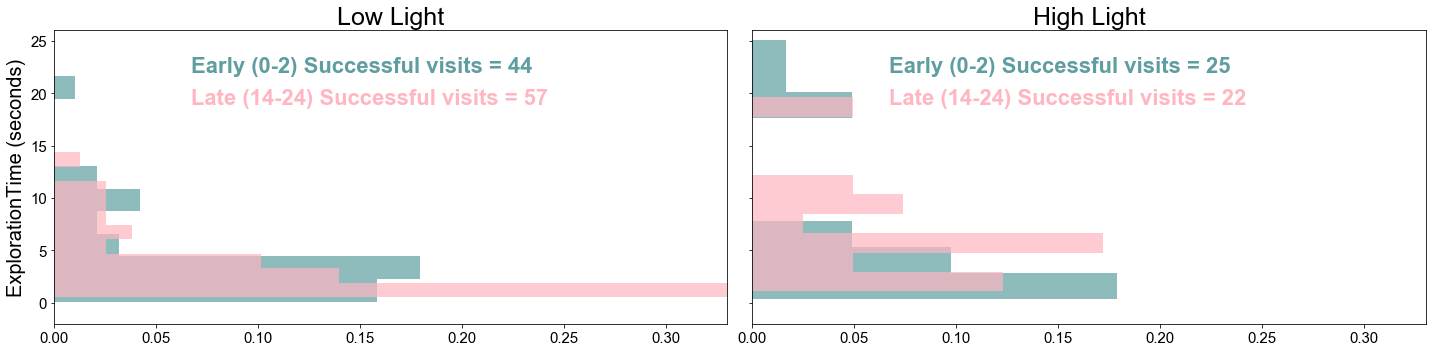

In [33]:
#add a comparison between the early and late visits within a light level (one plot comparing two time points with similar N size maybe 0-10 vs 15-25?)fig, ax = plt.subplots(1,2, figsize = (20,5), sharex = True, sharey = True)
fig, ax = plt.subplots(1,2, figsize = (20,5), sharex = True, sharey = True)
ax = ax.ravel()


hist_early_lowlight, _, _ = ax[0].hist(notoutliers.DiscoveryTime[(notoutliers.name.str.contains('L0.1_')) & 
                                     (notoutliers.trialNum >= 0) & (notoutliers.trialNum <= 2)].values,
            orientation='horizontal', alpha = 0.7, color = 'cadetblue', density = True)
hist_late_lowlight, _, _ = ax[0].hist(notoutliers.DiscoveryTime[(notoutliers.name.str.contains('L0.1_')) & 
                                     (notoutliers.trialNum >= 14) & (notoutliers.trialNum <= 24)].values, 
            orientation='horizontal', alpha = 0.7, color = 'lightpink', density = True)
hist_early_highlight, _, _ = ax[1].hist(notoutliers.DiscoveryTime[(notoutliers.name.str.contains('L50')) & 
                                     (notoutliers.trialNum >= 0) & (notoutliers.trialNum <= 2)].values, orientation='horizontal', alpha = 0.7, color = 'cadetblue', density = True)
hist_late_highlight, _, _ = ax[1].hist(notoutliers.DiscoveryTime[(notoutliers.name.str.contains('L50')) & 
                                     (notoutliers.trialNum >= 14) & (notoutliers.trialNum <= 24)].values, orientation='horizontal', alpha = 0.7, color = 'lightpink', density = True)

ax[0].set_title('Low Light', size = 25)
ax[1].set_title('High Light', size = 25)
                                      



ax[0].set_ylim(-2, 26)
ax[0].set_ylabel('ExplorationTime (seconds)', size = 20, color = 'k')
ax[0].set_xlim(0,.33)
# ax[0].text(.35,-9,'Probability occurance', size = 24)
ax[0].tick_params(labelsize = 15, labelcolor = 'k')
ax[1].tick_params(labelsize = 15, labelcolor = 'k')



ax[0].text(0.067, 22, 'Early (0-2) Successful visits = ' + str(first_3_low), color = 'cadetblue', weight = 'bold', size = 22)
ax[0].text(0.067, 19, 'Late (14-24) Successful visits = ' + str(V_14thru19_low), color = 'lightpink', weight = 'bold', size = 22)
# ax[0].text(0.2, 22, color = 'r', weight = 'bold', size = 22)


ax[1].text(0.067, 22, 'Early (0-2) Successful visits = ' + str(first_3_high), color = 'cadetblue', weight = 'bold', size = 22)
ax[1].text(0.067, 19, 'Late (14-24) Successful visits = ' + str(V_14thru19_high), color = 'lightpink', weight = 'bold', size = 22)
# ax[1].text(0.2, 22, color = 'k', weight = 'bold', size = 22)
plt.tight_layout()
plt.savefig(outpath_figg + "//" + 'Early_0thru3_Late_14thru19_Comparison_AcrossLights.svg')

In [34]:
low = notoutliers[(notoutliers.name.str.contains('L0.1_')) & (notoutliers.trialNum >= 0) & (notoutliers.trialNum <= 2)| (notoutliers.name.str.contains('L0.1_')) & (notoutliers.trialNum >= 14) & (notoutliers.trialNum <= 19)]
high = notoutliers[(notoutliers.name.str.contains('L50_')) & (notoutliers.trialNum >= 0) & (notoutliers.trialNum <= 2)| (notoutliers.name.str.contains('L50_')) & (notoutliers.trialNum >= 14) & (notoutliers.trialNum <= 19)]

In [35]:
visit_epoch = []
for element in low.trialNum.values:
    if element < 10:
        visit_epoch.append("early")
    else:
        visit_epoch.append("late")

In [36]:
high_visit_epoch = []
for element in high.trialNum.values:
    if element < 10:
        high_visit_epoch.append("early")
    else:
        high_visit_epoch.append("late")

In [37]:
visit_chunk = pd.DataFrame(data = visit_epoch, columns = ["visit_chunk"])
high_visit_chunk = pd.DataFrame(data = high_visit_epoch, columns = ["visit_chunk"])

In [38]:
low = low.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis = 1)
low.reset_index(drop=True, inplace=True)
high = high.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis = 1)
high.reset_index(drop=True, inplace=True)

In [39]:
low = pd.concat([low, visit_chunk], axis = 1)
high = pd.concat([high, high_visit_chunk], axis = 1)

In [40]:
alldata = low.DiscoveryTime/100
_,bins = np.histogram(alldata, bins = 100, density = True)
bin_center = 0.5*(bins[1:]+bins[:-1])
bin_center = np.linspace(0,60,200)
delta = np.diff(bin_center)[0]

In [41]:
low_df = pd.DataFrame(index = bin_center, columns = ['early', 'late'], dtype = 'float')
high_df = pd.DataFrame(index = bin_center, columns = ['early', 'late'], dtype = 'float')
light_level = pd.DataFrame(index = ['early', 'late'], columns = ['low', 'high'], dtype = 'float')

In [42]:
low_early = low[low.visit_chunk == 'early'].DiscoveryTime.values
low_late = low[low.visit_chunk == 'late'].DiscoveryTime.values
low_p_val = stats.mannwhitneyu(low_early,low_late)[1]
low_p_val

0.193077994266881

44
34


<Figure size 432x288 with 0 Axes>

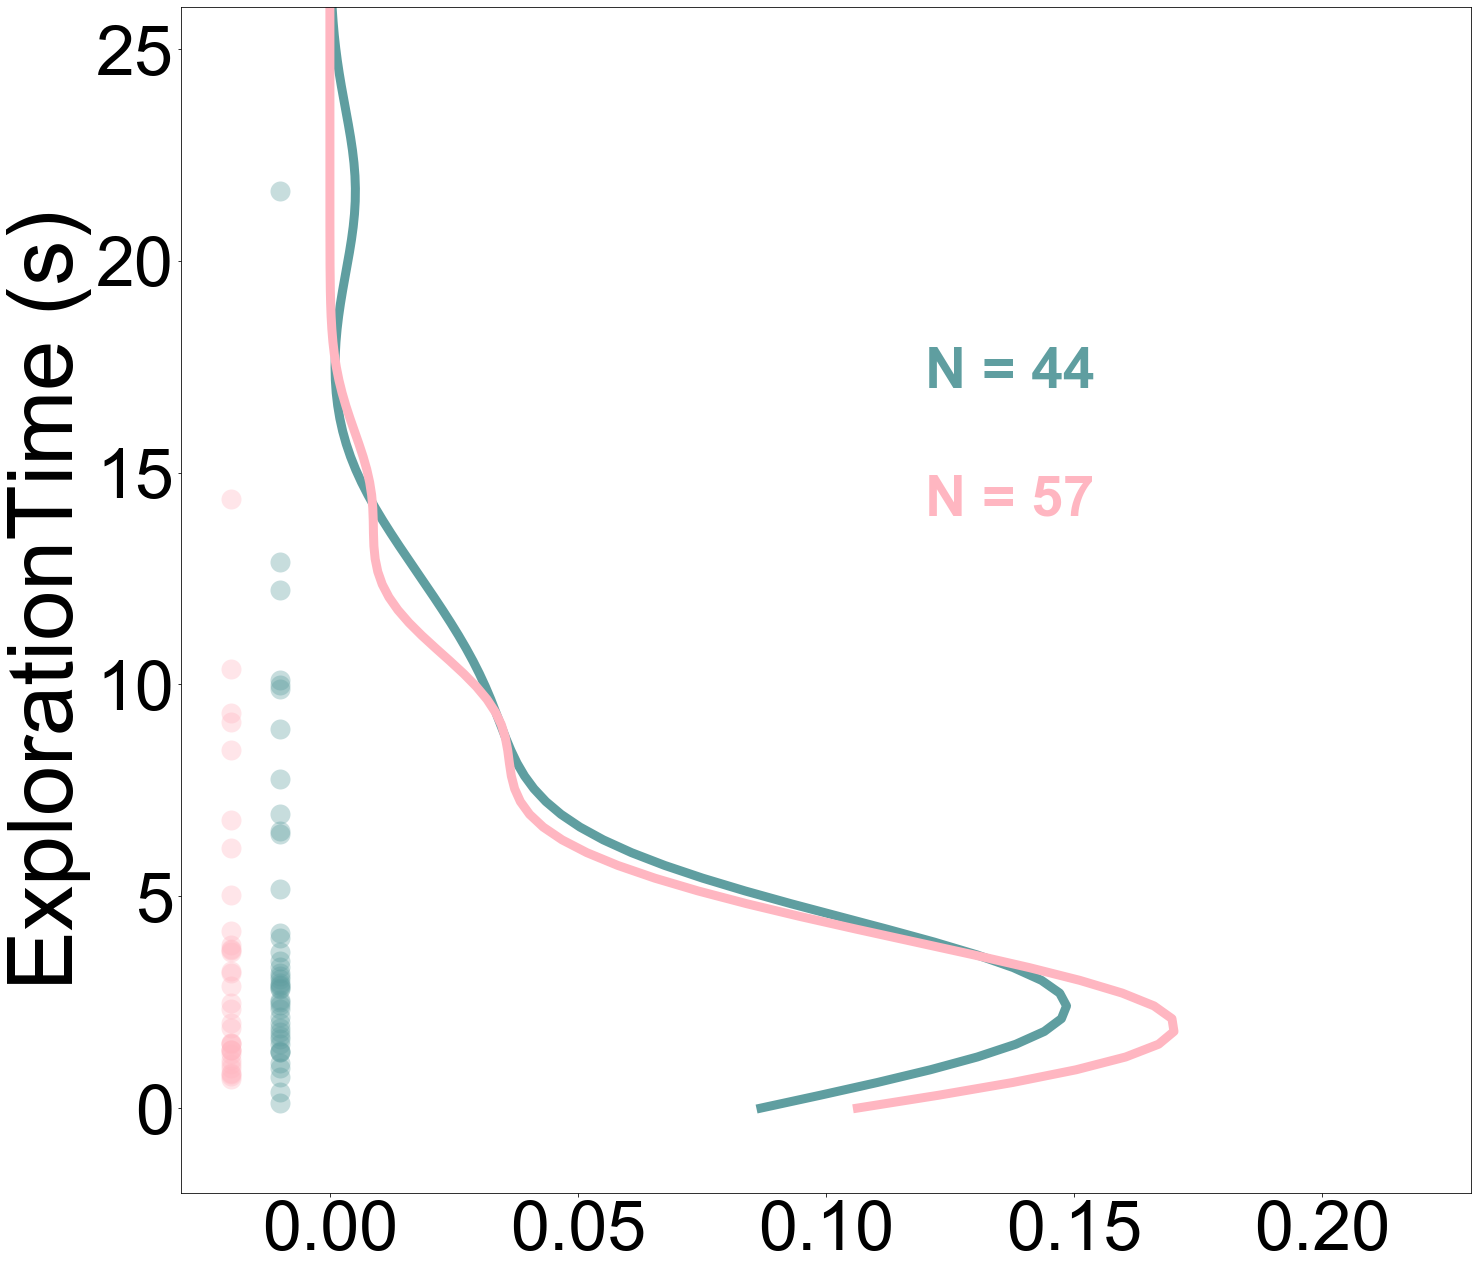

In [43]:
plt.set_cmap('Spectral')
f2, ax2 = plt.subplots(figsize = (20.63,17.76))

style.use('seaborn-talk')

offset = 0


for f, df in low.groupby('visit_chunk', sort = True):
    
    data = df.DiscoveryTime   
    light_level.loc[f,'low'] = len(data)
    print(len(data))
    kde = kde_scipy(data)
    
    
    temp = kde.pdf(bin_center)
    temp /= delta * np.sum(temp)
    low_df.loc[:,f] = temp
    
    
    if f.startswith("early"):
        c = 'cadetblue'
        
        d = 'cadetblue'
    elif f.startswith("late"):
        c = 'lightpink'
        
        
        d = 'lightpink'
    
    p = ax2.plot(temp, bin_center, label = f, color = c, linewidth=9.0)
    ax2.plot([-0.01 + offset]*len(data), data, 'o', ms = 20, color = c, mec = d, alpha = 0.35)
    offset+=-0.01
    
ax2.text(0.12, 17, 'N = ' + str(first_3_low), color = 'cadetblue', weight = 'bold', size = 57)
ax2.text(0.12, 14, 'N = ' + str(V_14thru19_low), color = 'lightpink', weight = 'bold', size = 57)

plt.ylim(-2, 26)
plt.ylabel('ExplorationTime (s)', size = 90, color = 'k')
plt.xlim(-.03, .23)
plt.tick_params(labelsize = 70, labelcolor = 'k')



plt.tight_layout()
plt.savefig(outpath_figg + "//" + 'Early_Late_Comparison_Low_PDE.svg')

In [44]:
high_early = high[high.visit_chunk == 'early'].DiscoveryTime.values
high_late = high[high.visit_chunk == 'late'].DiscoveryTime.values
high_p_val = stats.mannwhitneyu(high_early,high_late)[1]
high_p_val

0.04337546971203936

25
14


<Figure size 748.8x514.8 with 0 Axes>

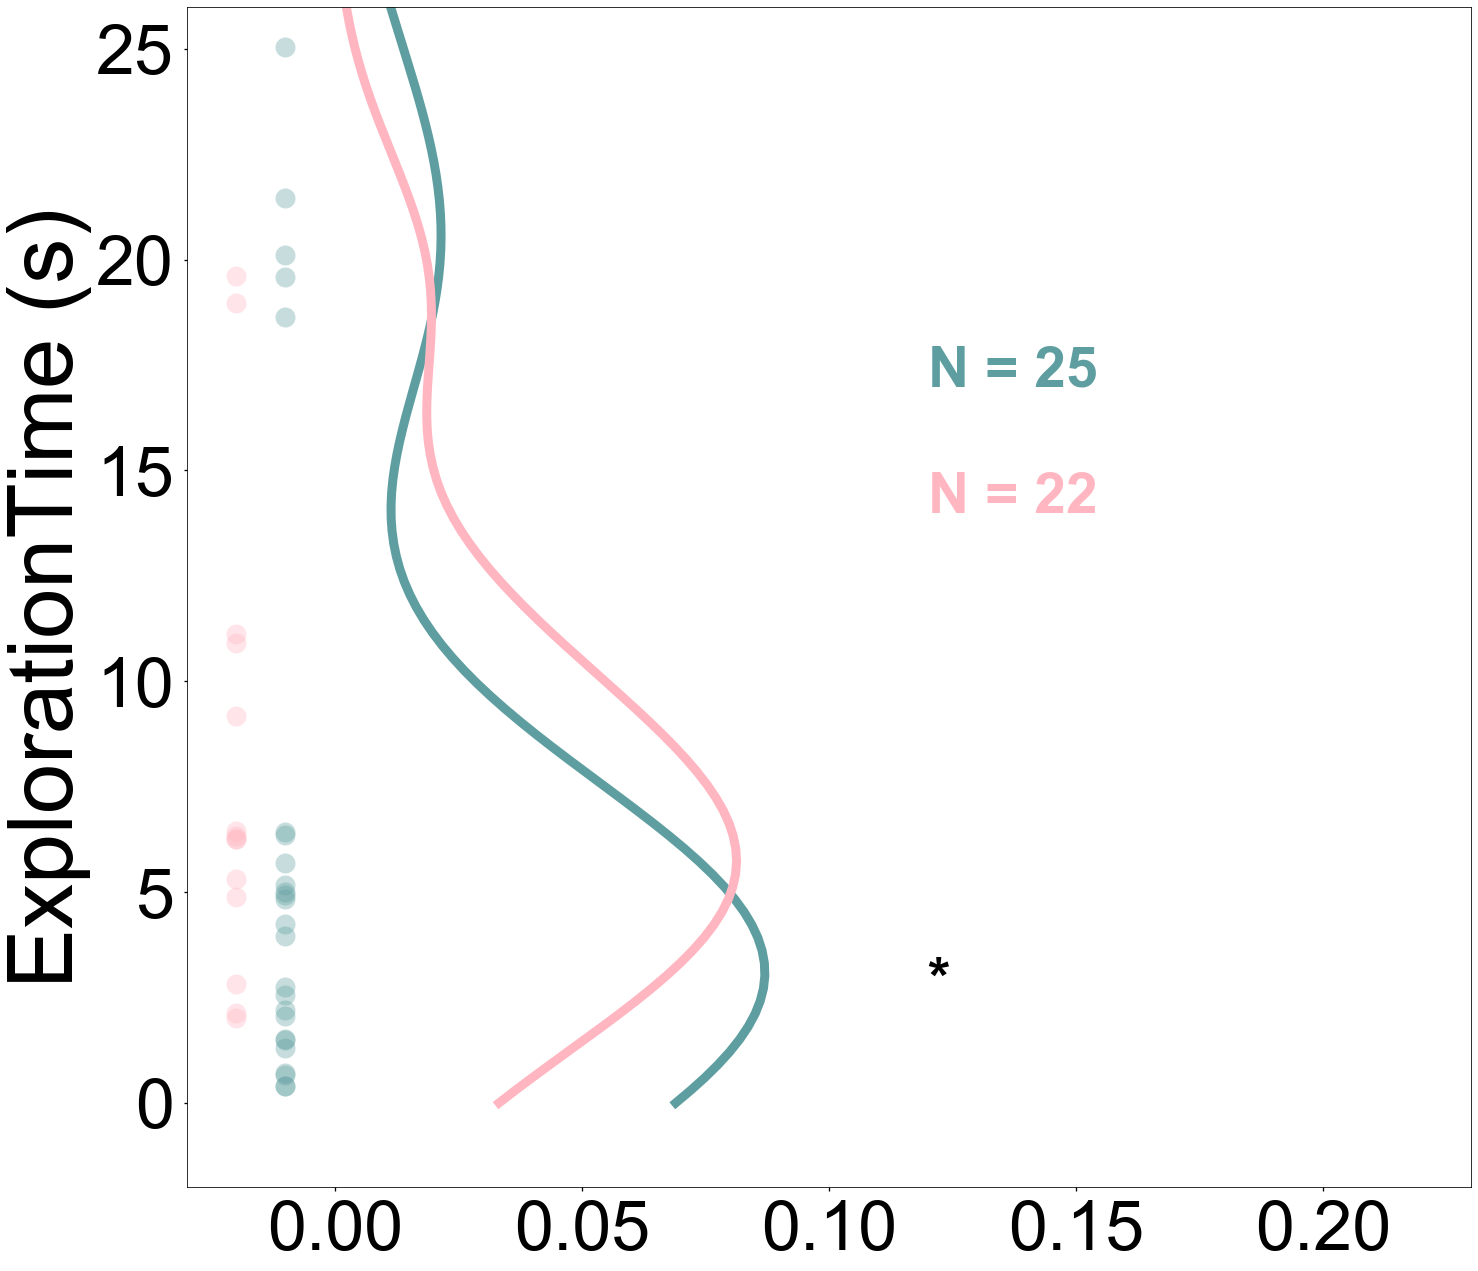

In [45]:
plt.set_cmap('Spectral')
f2, ax2 = plt.subplots(figsize = (20.63,17.76))

style.use('seaborn-talk')

offset = 0

for f, df in high.groupby('visit_chunk', sort = True):
    
    data = df.DiscoveryTime   
    light_level.loc[f,'high'] = len(data)
    print(len(data))
    kde = kde_scipy(data)
    
    
    temp = kde.pdf(bin_center)
    temp /= delta * np.sum(temp)
    low_df.loc[:,f] = temp
    
    
    if f.startswith("early"):
        c = 'cadetblue'
        
        d = 'cadetblue'
    elif f.startswith("late"):
        c = 'lightpink'
        
        d = 'lightpink'
    
    p = ax2.plot(temp, bin_center, label = f, color = c, linewidth=9.0)
    ax2.plot([-0.01 + offset]*len(data), data, 'o', ms = 20, color = c, mec = d, alpha = 0.35)
    plt.xlim(-.03, .23)
    offset+=-0.01
    

ax2.text(0.12, 17, 'N = ' + str(first_3_high), color = 'cadetblue', weight = 'bold', size = 57)
ax2.text(0.12, 14, 'N = ' + str(V_14thru19_high), color = 'lightpink', weight = 'bold', size = 57)

plt.ylim(-2, 26)

plt.ylabel('ExplorationTime (s)', size = 90, color = 'k')

plt.tick_params(labelsize = 70, labelcolor = 'k')

plt.text(0.12, 2.5, '*', weight = 'bold', size = 57 )

plt.tight_layout()
plt.savefig(outpath_figg + "//" + 'Early_Late_Comparison_High_PDE.svg')